
### Converting Matrix to Adjacenecy Lists
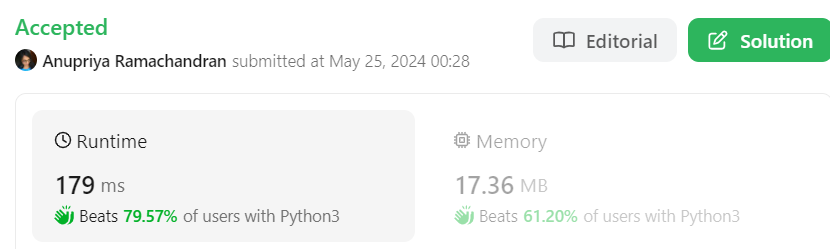


In [3]:
from typing import List
import collections

class Solution:
    def findCircleNum(self, M: List[List[int]]) -> int:
        graph = collections.defaultdict(list)
        
        n = len(M)
        if not M:
            return 0
        
        # Convert matrix into graph
        for i in range(n):
            for j in range(i+1, n):
                if M[i][j] == 1:
                    graph[i].append(j)
                    graph[j].append(i)

        visit = [False]* n      # Visit list to check which node is visited

        # write dfs function
        def dfs(u):
            for v in graph[u]:
                if visit[v] == False:
                    visit[v] = True
                    dfs(v)

        
        # count the non-connected nodes
        count = 0

        for i in range(n):
            if visit[i] == False:
                count += 1
                visit[i] = True
                dfs(i)

        return count

# Using Matrix 
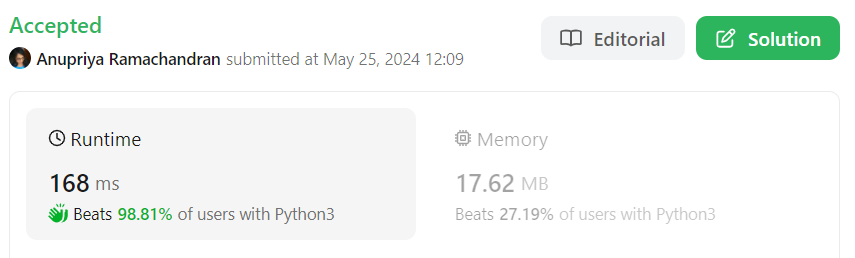

In [11]:
from typing import List
class Solution:
    def findCircleNum(self, M: List[List[int]]) -> int:
        if not M:
            return 0

        n = len(M)
        visit = [False]* n

        def dfs(u):
            for v in range(n):
                if M[u][v] == 1 and visit[v] == False:
                    visit[v] = True
                    dfs(v)

        count = 0
        for i in range(n):
            if visit[i] == False:
                count += 1
                visit[i] = True
                dfs(i)

        return count

## DISJOINT UNION SET
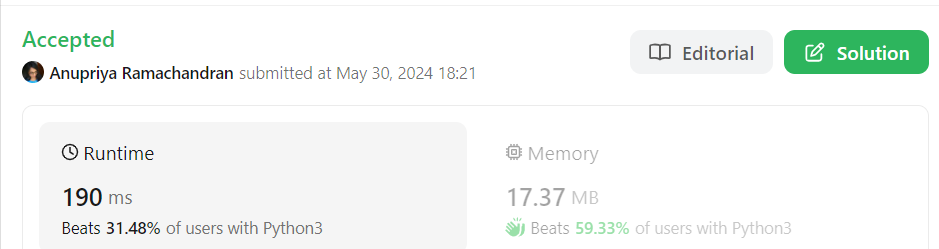

In [2]:
from typing import List
class Solution:
    def findCircleNum(self, isConnected: List[List[int]]) -> int:
        n, cols = len(isConnected), len(isConnected[0])

        parent = list(range(n+1))
        size = [0] * (n+1)

        def findroot(node):
            if parent[node] == node:
                return node
            parent[node] = findroot(parent[node])
            return parent[node]

        def UnionBySize( u, v):
            root_u = findroot(u)
            root_v = findroot(v)
            if root_u == root_v:
                return

            if size[root_u] < size[root_v]:
                parent[root_u] = root_v
                size[root_v] += size[root_u]
            else:
                parent[root_v] = root_u
                size[root_u] += size[root_v]

        for i in range(n):
            for j in range(cols):
                if isConnected[i][j] == 1:
                    UnionBySize(i, j)

        provinces = 0
        for i in range(n):
            if parent[i] == i:   # Counting the roots
                provinces += 1   
        return provinces

In [6]:
class Solution:
    def findCircleNum(self, isConnected: List[List[int]]) -> int:
        def find(node):
            if parent[node] != node:
                parent[node] = find(parent[node])
            return parent[node]

        def union(node1, node2):
            parent[find(node1)] = find(node2)

        n = len(isConnected)
        parent = list(range(n))
        provinces = n
        print(f"before parent: {parent}")    # [0, 1, 2]  all are disconnected components

        for i in range(n):
            for j in range(i + 1, n):
                if isConnected[i][j] == 1 and find(i) != find(j):
                    union(i, j)
                    provinces -= 1
         print(f"after parent: {parent}")    # two of them areconnected
        return provinces      

In [7]:
isConnected =[[1,1,0],[1,1,0],[0,0,1]]
sol = Solution()
sol.findCircleNum(isConnected )

before parent: [0, 1, 2]
after parent: [1, 1, 2]


2

In [1]:
print("Hello")

Hello
